In [42]:
import torch.nn as nn
import torch
from torchvision import datasets, transforms
import numpy as np
import torch.nn.functional as F
import os
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torch.optim.lr_scheduler import StepLR

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Functii de transformare a imaginilor

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]

)

trainset = datasets.CIFAR10(root = './data', train=True, transform=transform, download=True)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train = False, download = True, transform=transform)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### Definirea retelelor neurale

In [4]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x


In [5]:
model = LinearModel().to(device)
model

LinearModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [46]:
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels = 3, out_channels= 16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
        self.lin1 = nn.Linear(32*5*5, 256)
        self.lin2 = nn.Linear(256, 128)
        self.lin3 = nn.Linear(128, 10)

    
    def forward(self, x):
        x = self.cnn1(x)
        x = F.relu(x)
        x = self.pool(x)
        
    

        x = self.cnn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x,1)

        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)
        
        return x



In [56]:
model_cnn = CNN_model().to(device)
model_cnn

CNN_model(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (lin1): Linear(in_features=800, out_features=256, bias=True)
  (lin2): Linear(in_features=256, out_features=128, bias=True)
  (lin3): Linear(in_features=128, out_features=10, bias=True)
)

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [51]:
net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_cnn.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size = 7, gamma=0.1)

In [58]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.112
[1,  4000] loss: 1.743
[1,  6000] loss: 1.560
[1,  8000] loss: 1.463
[1, 10000] loss: 1.405
[1, 12000] loss: 1.333
[2,  2000] loss: 1.250
[2,  4000] loss: 1.217
[2,  6000] loss: 1.175
[2,  8000] loss: 1.137
[2, 10000] loss: 1.143
[2, 12000] loss: 1.102
[3,  2000] loss: 0.991
[3,  4000] loss: 1.021
[3,  6000] loss: 1.000
[3,  8000] loss: 0.959
[3, 10000] loss: 0.977
[3, 12000] loss: 0.954
[4,  2000] loss: 0.821
[4,  4000] loss: 0.862
[4,  6000] loss: 0.847
[4,  8000] loss: 0.844
[4, 10000] loss: 0.863
[4, 12000] loss: 0.865
[5,  2000] loss: 0.718
[5,  4000] loss: 0.731
[5,  6000] loss: 0.746
[5,  8000] loss: 0.760
[5, 10000] loss: 0.787
[5, 12000] loss: 0.759
Finished Training


In [59]:
path = './cnn_cifar.pth'
torch.save(model_cnn.state_dict(), path)

In [4]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

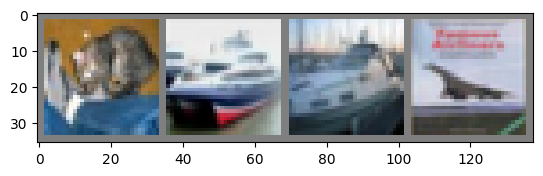

GroundTruth:  cat   ship  ship  plane


In [5]:
dataiter = iter(testloader)
images,labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [67]:
images,labels = images.to(device), labels.to(device)
outputs = model_cnn(images) 

In [75]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [78]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images,labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(predicted == labels).sum().item()

print(f"The Accuracy of the network on the {total} test images: {100*correct/total} %")

The Accuracy of the network on the 10000 test images: 68.31 %


In [22]:
class better_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1, padding = 1)
        self.batch = nn.BatchNorm2d(num_features=32)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding = 1)
        self.batch2 = nn.BatchNorm2d(num_features=64)
        self.linear1 = nn.Linear(64*8*8, 512)
        self.drop = nn.Dropout(0.25)
        self.linear2 = nn.Linear(in_features=512, out_features=128)
        self.linear3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = F.relu(self.maxpool(self.batch(self.conv1(x))))
        x = F.relu(self.maxpool(self.batch2(self.conv2(x))))
        x = torch.flatten(x,1)
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x        

In [23]:
model_better = better_cnn().to(device)
model_better

better_cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=4096, out_features=512, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_better.parameters(), lr=0.001, momentum=0.9)

In [25]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model_better(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.861
[1,  4000] loss: 1.606
[1,  6000] loss: 1.468
[1,  8000] loss: 1.381
[1, 10000] loss: 1.313
[1, 12000] loss: 1.266
[2,  2000] loss: 1.170
[2,  4000] loss: 1.147
[2,  6000] loss: 1.118
[2,  8000] loss: 1.091
[2, 10000] loss: 1.061
[2, 12000] loss: 1.022
[3,  2000] loss: 0.938
[3,  4000] loss: 0.950
[3,  6000] loss: 0.922
[3,  8000] loss: 0.900
[3, 10000] loss: 0.908
[3, 12000] loss: 0.888
[4,  2000] loss: 0.791
[4,  4000] loss: 0.785
[4,  6000] loss: 0.812
[4,  8000] loss: 0.804
[4, 10000] loss: 0.776
[4, 12000] loss: 0.765
[5,  2000] loss: 0.680
[5,  4000] loss: 0.663
[5,  6000] loss: 0.681
[5,  8000] loss: 0.695
[5, 10000] loss: 0.695
[5, 12000] loss: 0.695
[6,  2000] loss: 0.570
[6,  4000] loss: 0.585
[6,  6000] loss: 0.602
[6,  8000] loss: 0.625
[6, 10000] loss: 0.607
[6, 12000] loss: 0.613
[7,  2000] loss: 0.494
[7,  4000] loss: 0.511
[7,  6000] loss: 0.526
[7,  8000] loss: 0.531
[7, 10000] loss: 0.534
[7, 12000] loss: 0.527
[8,  2000] loss: 0.416
[8,  4000] 

In [26]:
path = './model_better.pth'
torch.save(model_better.state_dict(), path)

In [28]:
images, labels = images.to(device), labels.to(device)
outputs1 = model_better(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  bird  deer  plane dog  


In [29]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images,labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_better(images)
        _, predicted = torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(predicted == labels).sum().item()

print(f"The Accuracy of the network on the {total} test images: {100*correct/total} %")

The Accuracy of the network on the 10000 test images: 72.08 %


72% accuracy with loss of 0.120 => overfitting, we need to make a new better model

in order to get above 80% we need to do a few things:
1. We have to apply random effects to the training images (flipping, cropping and padding)
2. We will use a deeper model with 3 convolutional layers
3. Our learning rate will be decayed as the training goes on

In [30]:
transform_train = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.RandomCrop(32, padding = 4),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ]
)

transform_test = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

trainset = datasets.CIFAR10('./data', train = True, transform = transform_train, download = True)
trainloader = DataLoader(trainset, batch_size = 4, shuffle = True, num_workers=4)

testset = datasets.CIFAR10('./data', train = False, transform = transform_test, download=True)
testloader = DataLoader(testset, batch_size = 4, shuffle = False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [53]:
class deep_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.batch1 = nn.BatchNorm2d(num_features=32)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.batch2 = nn.BatchNorm2d(num_features=64)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batch3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.lin1 = nn.Linear(128*4*4, 1024)
        self.lin2 = nn.Linear(1024, 512)
        self.lin3 = nn.Linear(512, 10)

        self.drop = nn.Dropout(p = 0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.batch1(self.conv1(x))))
        x = self.pool(F.relu(self.batch2(self.conv2(x))))
        x = self.pool(F.relu(self.batch3(self.conv3(x))))
        x = self.flatten(x)
        x = F.relu(self.drop(self.lin1(x)))
        x = F.relu(self.drop(self.lin2(x)))
        x = self.lin3(x)
        return x

In [61]:
model_deep = deep_cnn().to(device)
model_deep

deep_cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=2048, out_features=1024, bias=True)
  (lin2): Linear(in_features=1024, out_features=512, bias=True)
  (lin3): Linear(in_features=512, out_features=10, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
)

In [62]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model_deep.parameters(), lr = 0.001)
optimizer = optim.SGD(model_deep.parameters(), lr = 0.01, momentum = 0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=7, gamma = 0.1)

In [ ]:
for epoch in range(30):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model_deep(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    scheduler.step()

print('Finished Training')

In [51]:
images, labels = images.to(device), labels.to(device)
outputs1 = model_deep(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  deer  truck dog   truck


In [52]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images,labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model_deep(images)
        _, predicted = torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(predicted == labels).sum().item()

print(f"The Accuracy of the network on the {total} test images: {100*correct/total} %")

The Accuracy of the network on the 10000 test images: 70.07 %


Well... it did not work, let's try an arhitecture similar to VGG-net in the next notebook